In [1]:
# Dependencies
# ----------------------------------
# Imports the method used for connecting to DBs
from sqlalchemy import create_engine


# Imports the methods needed to abstract classes into tables
from sqlalchemy.ext.declarative import declarative_base

# Allow us to declare column types
from sqlalchemy import Column, Integer, String, Float, Date

#Import Pandas
import pandas as pd

#Import datetime
import datetime

In [2]:
#get the file
mac_df = "data/202003-citibike-tripdata.csv"
apr_df = "data/202004-citibike-tripdata.csv"
may_df = "data/202005-citibike-tripdata.csv"
jun_df = "data/202006-citibike-tripdata.csv"
fcovid_df = "data/firstccases.csv"

In [3]:
#read the data file
df_mac = pd.read_csv(mac_df)
df_apr = pd.read_csv(apr_df)
df_may = pd.read_csv(may_df)
df_jun = pd.read_csv(jun_df)
df_fcovid = pd.read_csv(fcovid_df)

In [4]:
#combine citibike dataframe
frames = [df_mac, df_apr, df_may, df_jun]

In [5]:
fcitibike = pd.concat(frames)

In [6]:
fcitibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1589,2020-03-01 00:00:03.6400,2020-03-01 00:26:32.9860,224,Spruce St & Nassau St,40.711464,-74.005524,3574,Prospect Pl & Underhill Ave,40.676969,-73.965790,16214,Subscriber,1980,1
1,389,2020-03-01 00:00:16.7560,2020-03-01 00:06:46.0620,293,Lafayette St & E 8 St,40.730207,-73.991026,223,W 13 St & 7 Ave,40.737815,-73.999947,29994,Subscriber,1991,2
2,614,2020-03-01 00:00:20.0580,2020-03-01 00:10:34.2200,379,W 31 St & 7 Ave,40.749156,-73.991600,515,W 43 St & 10 Ave,40.760094,-73.994618,39853,Subscriber,1991,1
3,597,2020-03-01 00:00:24.3510,2020-03-01 00:10:22.3390,3739,Perry St & Greenwich Ave,40.735918,-74.000939,325,E 19 St & 3 Ave,40.736245,-73.984738,42608,Subscriber,1989,1
4,1920,2020-03-01 00:00:26.1120,2020-03-01 00:32:26.2680,236,St Marks Pl & 2 Ave,40.728419,-73.987140,3124,46 Ave & 5 St,40.747310,-73.954510,36288,Subscriber,1993,1


In [7]:
fcitibike["starttime"] = pd.to_datetime(fcitibike["starttime"])

In [8]:
fcitibike["date"] = fcitibike["starttime"].dt.date

In [9]:
fcitibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1589,2020-03-01 00:00:03.640,2020-03-01 00:26:32.9860,224,Spruce St & Nassau St,40.711464,-74.005524,3574,Prospect Pl & Underhill Ave,40.676969,-73.965790,16214,Subscriber,1980,1,2020-03-01
1,389,2020-03-01 00:00:16.756,2020-03-01 00:06:46.0620,293,Lafayette St & E 8 St,40.730207,-73.991026,223,W 13 St & 7 Ave,40.737815,-73.999947,29994,Subscriber,1991,2,2020-03-01
2,614,2020-03-01 00:00:20.058,2020-03-01 00:10:34.2200,379,W 31 St & 7 Ave,40.749156,-73.991600,515,W 43 St & 10 Ave,40.760094,-73.994618,39853,Subscriber,1991,1,2020-03-01
3,597,2020-03-01 00:00:24.351,2020-03-01 00:10:22.3390,3739,Perry St & Greenwich Ave,40.735918,-74.000939,325,E 19 St & 3 Ave,40.736245,-73.984738,42608,Subscriber,1989,1,2020-03-01
4,1920,2020-03-01 00:00:26.112,2020-03-01 00:32:26.2680,236,St Marks Pl & 2 Ave,40.728419,-73.987140,3124,46 Ave & 5 St,40.747310,-73.954510,36288,Subscriber,1993,1,2020-03-01


In [10]:
fcitibike_by_date = fcitibike.groupby([fcitibike['date']]).starttime.count()

In [11]:
fcitibike_by_date = pd.DataFrame(fcitibike_by_date)

In [12]:
fcitibike_by_date.head()

,starttime
date,
2020-03-01,31878
2020-03-02,56946
2020-03-03,49723
2020-03-04,58670
2020-03-05,58686


In [13]:
fcitibike_by_date=fcitibike_by_date.rename(columns={"date": "date", "starttime": "no_of_trip"})

In [14]:
df_fcovid.head()

,Date,Confirmed Cases,cases_per_day,Deaths,Deaths per day
0,01/03/2020,1,0,2,1
1,02/03/2020,1,0,4,2
2,03/03/2020,2,1,11,7
3,04/03/2020,7,5,13,2
4,05/03/2020,10,3,27,14


In [15]:
df_fcovid["Date"] = pd.to_datetime(df_fcovid["Date"], format='%d/%m/%Y')

In [16]:
df_fcovid["date"] = df_fcovid["Date"].dt.date

In [17]:
df_fcovid.head()

,Date,Confirmed Cases,cases_per_day,Deaths,Deaths per day,date
0,2020-03-01,1,0,2,1,2020-03-01
1,2020-03-02,1,0,4,2,2020-03-02
2,2020-03-03,2,1,11,7,2020-03-03
3,2020-03-04,7,5,13,2,2020-03-04
4,2020-03-05,10,3,27,14,2020-03-05


In [18]:
fcovid_df_by_date = df_fcovid[["date","cases_per_day"]]

In [19]:
fcovid_df_by_date.head()

,date,cases_per_day
0,2020-03-01,0
1,2020-03-02,0
2,2020-03-03,1
3,2020-03-04,5
4,2020-03-05,3


In [20]:
fcitibike_covid_df = fcovid_df_by_date.merge(fcitibike_by_date, how="inner", on ="date")

In [21]:
fcitibike_covid_df 

,date,cases_per_day,no_of_trip
0,2020-03-01,0,31878
1,2020-03-02,0,56946
2,2020-03-03,1,49723
3,2020-03-04,5,58670
4,2020-03-05,3,58686
...,...,...,...
117,2020-06-26,316,73638
118,2020-06-27,206,59221
119,2020-06-28,202,69104
120,2020-06-29,437,61574


In [22]:
fcitibike_covid_df = fcitibike_covid_df.sort_values('date')
seven_days = pd.Timedelta(days=7)
seven_days_date = (fcitibike_covid_df["date"] + seven_days)
fcitibike_covid_df["last_seven_days_cases"] = fcitibike_covid_df['cases_per_day'].rolling(min_periods=0, window=7).mean()
fcitibike_covid_df["last_seven_days_no_of_trip"] = fcitibike_covid_df['no_of_trip'].rolling(min_periods=0, window=7).mean()
fcitibike_covid_df.head(14)

,date,cases_per_day,no_of_trip,last_seven_days_cases,last_seven_days_no_of_trip
0,2020-03-01,0,31878,0.000000,31878.000000
1,2020-03-02,0,56946,0.000000,44412.000000
2,2020-03-03,1,49723,0.333333,46182.333333
3,2020-03-04,5,58670,1.500000,49304.250000
4,2020-03-05,3,58686,1.800000,51180.600000
5,2020-03-06,8,34135,2.833333,48339.666667
6,2020-03-07,7,39448,3.428571,47069.428571
7,2020-03-08,22,46994,6.571429,49228.857143
8,2020-03-09,57,68768,14.714286,50917.714286
9,2020-03-10,69,64277,24.428571,52996.857143


In [23]:
fcitibike_covid_df["date"] = pd.to_datetime(fcitibike_covid_df["date"] , format='%Y-%m-%d')

In [24]:
fcitibike_covid_df["date"] = fcitibike_covid_df["date"].dt.date

In [25]:
fcitibike_covid_df.head(14)

,date,cases_per_day,no_of_trip,last_seven_days_cases,last_seven_days_no_of_trip
0,2020-03-01,0,31878,0.000000,31878.000000
1,2020-03-02,0,56946,0.000000,44412.000000
2,2020-03-03,1,49723,0.333333,46182.333333
3,2020-03-04,5,58670,1.500000,49304.250000
4,2020-03-05,3,58686,1.800000,51180.600000
5,2020-03-06,8,34135,2.833333,48339.666667
6,2020-03-07,7,39448,3.428571,47069.428571
7,2020-03-08,22,46994,6.571429,49228.857143
8,2020-03-09,57,68768,14.714286,50917.714286
9,2020-03-10,69,64277,24.428571,52996.857143


In [26]:
fcitibike_covid_df = fcitibike_covid_df.iloc[6:]

In [27]:
fcitibike_covid_df.head()

,date,cases_per_day,no_of_trip,last_seven_days_cases,last_seven_days_no_of_trip
6,2020-03-07,7,39448,3.428571,47069.428571
7,2020-03-08,22,46994,6.571429,49228.857143
8,2020-03-09,57,68768,14.714286,50917.714286
9,2020-03-10,69,64277,24.428571,52996.857143
10,2020-03-11,155,61816,45.857143,53446.285714


In [28]:
fcitibike_covid_df.to_csv(r'data/data1.csv',index=False)

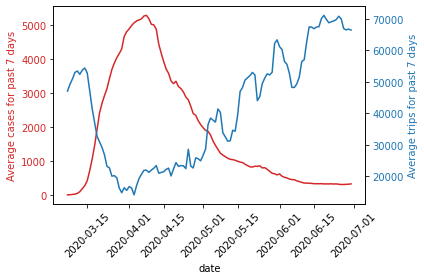

In [29]:
import matplotlib.pyplot as plt

t = fcitibike_covid_df['date']
data1 = fcitibike_covid_df['last_seven_days_cases']
data2 = fcitibike_covid_df['last_seven_days_no_of_trip']

fig, ax1 = plt.subplots()
plt.xticks(rotation = 45)

color = 'tab:red'
ax1.set_xlabel('date')
ax1.set_ylabel('Average cases for past 7 days', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Average trips for past 7 days', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('static\\images\linegraph.jpg',dpi=300)
plt.show()

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [31]:
# Assign the data to X and y

X = fcitibike_covid_df[["last_seven_days_cases"]].values.reshape(-1, 1)
y = fcitibike_covid_df["last_seven_days_no_of_trip"].values.reshape(-1, 1)
print(X.shape, y.shape)

(116, 1) (116, 1)


In [32]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [33]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [34]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7805568353180559
Testing Score: 0.6973221846526876


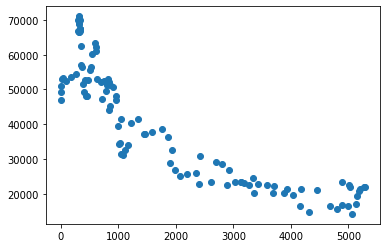

In [35]:
plt.scatter(X, y)
plt.show()

In [36]:
# Print the coefficient and the intercept for the model

### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
### END SOLUTION

Weight coefficients:  [[-9.37735733]]
y-axis intercept:  [59077.90184842]


In [37]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[3.42857143]]
Max X Value: [[5290.85714286]]


In [38]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

### BEGIN SOLUTION
y_min = model.predict(x_min)
y_max = model.predict(x_max)
### END SOLUTION

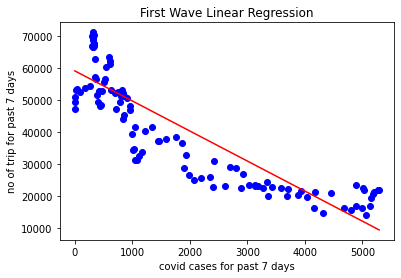

In [39]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

### BEGIN SOLUTION
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.savefig('static\\images\lr.jpg',dpi=300)
plt.xlabel('covid cases for past 7 days')
plt.ylabel('no of trip for past 7 days')
plt.title('First Wave Linear Regression')
plt.savefig('static\\images\lr.jpg',dpi=300)
plt.show()
### END SOLUTION

The linear model now looks like this:

y=73307.74332843-9.80861441x

In [40]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y.ravel()).predict(X)
y_lin = svr_lin.fit(X, y.ravel()).predict(X)
y_poly = svr_poly.fit(X, y.ravel()).predict(X)

In [41]:
#svr_poly.fit(X_train, y_train.ravel()).predict(X_train)

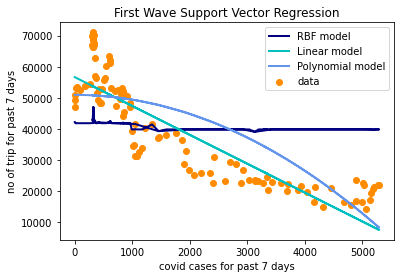

In [42]:
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
#plt.hold('on')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('covid cases for past 7 days')
plt.ylabel('no of trip for past 7 days')
plt.title('First Wave Support Vector Regression')
plt.legend()
plt.savefig('static\\images\svr.jpg',dpi=300)
plt.show()

Text(0.5, 1.0, 'Residual Plot')

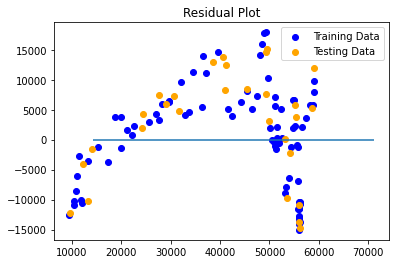

In [43]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION 
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data") 
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION